In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import fnmatch 
from tqdm import tqdm 
import fnmatch 
import torch 
import pandas as pd 
from utils import save_dir, analyze_dir, result_dir,train_pool

In [2]:
from utils import save_dir, analyze_dir, result_dir
model_identifier = 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed'
analyze_identifier= 'mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5'
train_identifier = 'epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06'

In [3]:
# load accuracy data first 
training_files=[]
for file in os.listdir(os.path.join(save_dir,model_identifier,train_identifier)):
    if fnmatch.fnmatch(file, '*.pth'):
            training_files.append(os.path.join(save_dir,model_identifier,train_identifier,file))

hier_accu=[]
for idx, files in tqdm(enumerate(training_files)):
    test=torch.load(files)
    hier_accu.append([test['epoch'],test['batchidx'], test['hier_test_acc']])
dummy=[]
epochs=[]
batches=[]
for item in hier_accu:
    epochs.append(item[0])
    batches.append(item[1])
    dummy.append(item[0]*10000+item[1])
fixed_idx=np.argsort(dummy)

1060it [00:18, 56.29it/s]


In [6]:
test['target_test']

tensor([17,  3, 37, 53,  0, 13, 52,  8, 60, 28,  2, 30, 56,  0, 21, 41,  9, 53,
         9, 49, 23, 39, 25, 35,  1, 29, 44, 15,  6, 28, 49, 61])

In [7]:
params = train_pool[model_identifier]()
params.load_dataset()
transfo_mat=params.dataset.transformation_mats



<HDF5 dataset "data": shape (128252,), type "|u1"> is not a matlab type
<HDF5 dataset "ir": shape (128252,), type "<u8"> is not a matlab type
<HDF5 dataset "jc": shape (64128,), type "<u8"> is not a matlab type
data type not supported: graph, uint32
data type not supported: graph, uint32


In [89]:
params.dataset.hierarchical_target[0]

array([ 0.,  0.,  0., ..., 63., 63., 63.])

In [21]:
 leaf=transfo_mat[0][np.sort(test['target_test'])]


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [82]:
len(transfo_mat)

6

In [17]:
np.where(np.matmul(leaf,transfo_mat[1]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([ 0,  0,  0,  1,  1,  3,  4,  4,  4,  6,  7,  8, 10, 11, 12, 14, 14,
        14, 15, 17, 18, 19, 20, 22, 24, 24, 26, 26, 26, 28, 30, 30]))

In [ ]:
within_class_ids=[np.arange(test['target_test'])]

In [27]:
hierarchical_classes=[np.apply_along_axis(np.where,1,np.matmul(leaf,x)).flatten() for x in transfo_mat]
hierarchical_classes

[array([ 0,  0,  1,  2,  3,  6,  8,  9,  9, 13, 15, 17, 21, 23, 25, 28, 28,
        29, 30, 35, 37, 39, 41, 44, 49, 49, 52, 53, 53, 56, 60, 61]),
 array([ 0,  0,  0,  1,  1,  3,  4,  4,  4,  6,  7,  8, 10, 11, 12, 14, 14,
        14, 15, 17, 18, 19, 20, 22, 24, 24, 26, 26, 26, 28, 30, 30]),
 array([ 0,  0,  0,  0,  0,  1,  2,  2,  2,  3,  3,  4,  5,  5,  6,  7,  7,
         7,  7,  8,  9,  9, 10, 11, 12, 12, 13, 13, 13, 14, 15, 15]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
        5, 5, 6, 6, 6, 6, 6, 7, 7, 7]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [ ]:
within_class_ids


In [41]:
[within_class_ids[1:],within_class_ids[0]*0+1]

[[array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
         18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26,
         26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32]),
  array([ 1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  5,
          5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9,  9,
          9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13,
         13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
         3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
         6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8]),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,

In [96]:
within_class_ids=[[np.arange(transfo_mat[0].shape[0]).reshape([-1,1])],[np.apply_along_axis(np.where,1,x).reshape([-1,1])+1 for x in transfo_mat]]
within_class_ids = [item for sublist in within_class_ids for item in sublist]
between_class_ids=[within_class_ids[1:],[within_class_ids[0]*0+1]]

between_class_ids = [item for sublist in between_class_ids for item in sublist]


In [97]:
withins=[]
betweens=[]
for k in range(len(between_class_ids)):
    temp=np.matmul(within_class_ids[k],within_class_ids[k].transpose())
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),temp.shape[0],axis=0)
    within_class=temp==temp1;
    withins.append(within_class)
    temp=np.matmul(between_class_ids[k],between_class_ids[k].transpose())
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),temp.shape[0],axis=0)
    between_class=temp==temp1;
    betweens.append(between_class)


    
    

In [102]:
hier_within_class=[]
hier_between_class=[]
for idx, _ in enumerate(range(len(betweens)-1)):
    A=withins[idx]==(~withins[idx+1])
    hier_within_class.append(A)
    
    B=betweens[idx]==(~betweens[idx+1])
    hier_between_class.append(B)

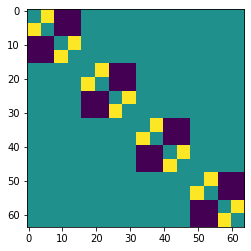

In [109]:
plt.imshow(hier_within_class[3].astype(int)-(hier_between_class[3]).astype(int))

In [ ]:
hier_within_class=[]
hier_between_class=[]
for idx, _ in enumerate(range(len(within_cell))):
    A=within_cell[idx]==(~between_cell[idx])
    hier_within_class.append(A)
    
    B=within_cell[idx]==(~between_2_cell[idx])
    B=B== ~A
    hier_between_class.append(B)

In [ ]:
within_cell=[];
between_cell=[];
between_2_cell=[];
for idx , _ in enumerate(range(len(within_class_id)-2)):
    within=within_class_id[idx]
    within=np.expand_dims(within,axis=0)
    temp=np.matmul(np.transpose(within),within)
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),within.shape[1],axis=0)
    within_class=temp==temp1;
    within_cell.append(within_class)

    between=np.repeat(np.expand_dims(np.unique(params.dataset.hierarchical_target[idx+1])+1,axis=0),2,axis=1)
    temp=np.matmul(np.transpose(between),between)
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),within.shape[1],axis=0)
    between_class=temp==temp1
    between_cell.append(between_class)
    
    
    between=np.repeat(np.expand_dims(np.unique(params.dataset.hierarchical_target[idx+2])+1,axis=0),4,axis=1)
    temp=np.matmul(np.transpose(between),between)
    temp1=np.repeat(np.expand_dims(np.diag(temp),axis=0),within.shape[1],axis=0)
    between_class=temp==temp1
    between_2_cell.append(between_class)